### **`MOOCs`**

                                    Análisis exploratorio de los datos


Con la intención de evaluar las metricas y variables claves de los datasets proporcionados se procedera hacer una normalizacion de las bases de datos proporcionadas esto con el fin de generar un analisis exclusivo y más performante para evitar errores en las prediciones o estimaciones que querramos hacer, ademas necesitamos generar unos KPIs es por esto en este notebook encontrara información precisa de cada paso realizado en cuanto a normalización y cuando este presente un grafico habrá un breve analisis sobre esa metrica ;)  sin más que decir sumerjamonos en este bello trabajo.

In [1]:
#importamos las librerias fundamentales para el analisis de datos y tambien librerias de vizualización de los mismos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **`Udemy`**

Primero vamos a extraer el dataset de udemy normalizamos el dataset y generamos una segmentación de las variables claves.

In [2]:
#Extremos el dataset y lo asignamos a una variable que lo tendrá almacenado
data_udemy = pd.read_csv('udemy_courses.csv')

In [3]:
#vizualizamos como vienen los datos
data_udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [4]:
#información del dataset
data_udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [5]:
#Verificamos si existen valores nulos y si los hay que los cuente por columna
data_udemy.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [6]:
#Chequeamos que no existan duplicados de ser asi los dropeamos del dataframe
data_udemy[data_udemy.duplicated()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03T00:55:31Z,Web Development


In [9]:
data_udemy.drop_duplicates(inplace=True) #Eliminamos los duplicados

In [30]:
#cambiamos la columna published_timestamp a un formato de solo fecha
data_udemy['published_timestamp'] = pd.to_datetime(data_udemy['published_timestamp'])
data_udemy['published_timestamp'] = data_udemy['published_timestamp'].dt.date

In [31]:
#vizualizamos nuevamente, vemos que no necesitamos más normalización y pasamos al analisis grafico 
#y sacar conclusiones de los mismos
data_udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13,Business Finance


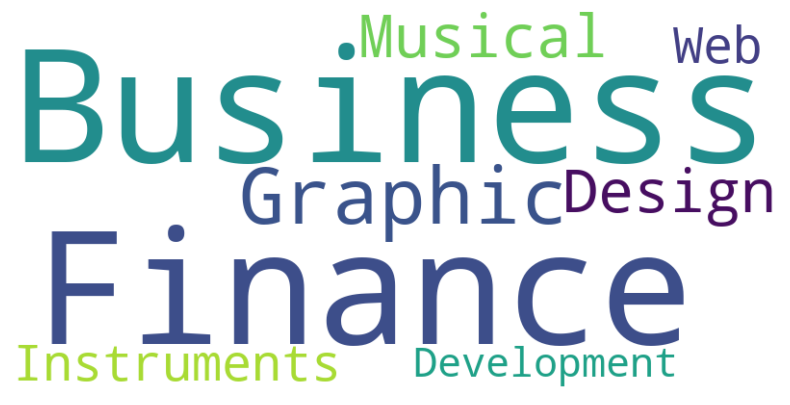

In [32]:
#Importamos el modulo wordcloud para generar una nube de palabras 
from wordcloud import WordCloud as wc

palabras = ' '.join(data_udemy['subject'].unique())
wordcloud = wc(width=800, height=400, background_color='white').generate(palabras)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Segmentación de los datos de acuerdo a las variables claves


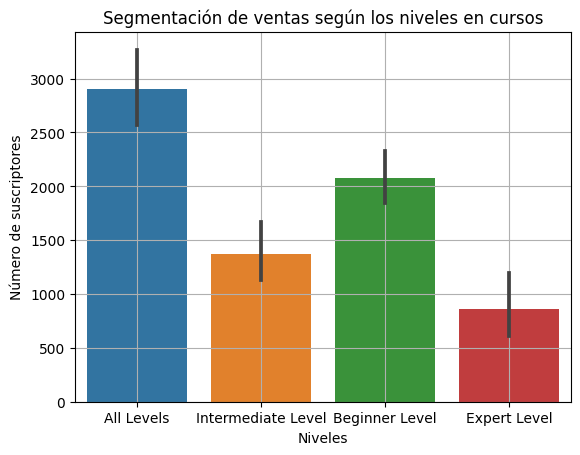

In [33]:
#Segmentación de nivel de ventas segun los niveles de los cursos 
ax = sns.barplot(x='level', y='num_subscribers', data= data_udemy[data_udemy['is_paid']==True])
ax.set(xlabel='Niveles', ylabel='Número de suscriptores', title='Segmentación de ventas según los niveles en cursos')
ax.grid()

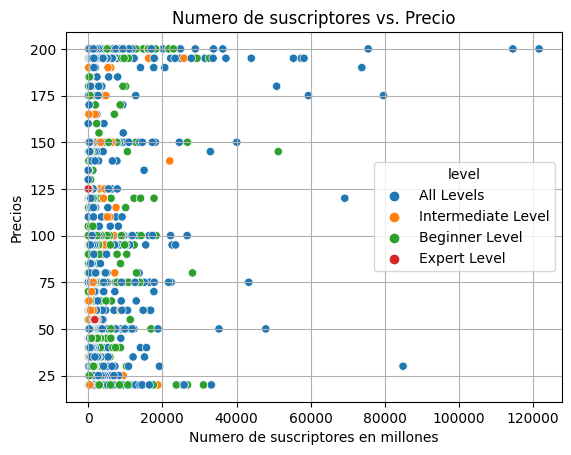

In [69]:
#Otra forma de vizualizar dichas metricas 
ax = sns.scatterplot(x='num_subscribers', y='price', hue='level', data=data_udemy[data_udemy['is_paid']==True])
ax.set(xlabel='Numero de suscriptores en millones', ylabel='Precios', title='Numero de suscriptores vs. Precio')
#ax.legend(loc='upper right', shadow=True, fontsize=10)
ax.grid()

Podemos apreciar de que los cursos todos los niveles y nivel principiantes son los que cuentan con más suscripciones pagadas

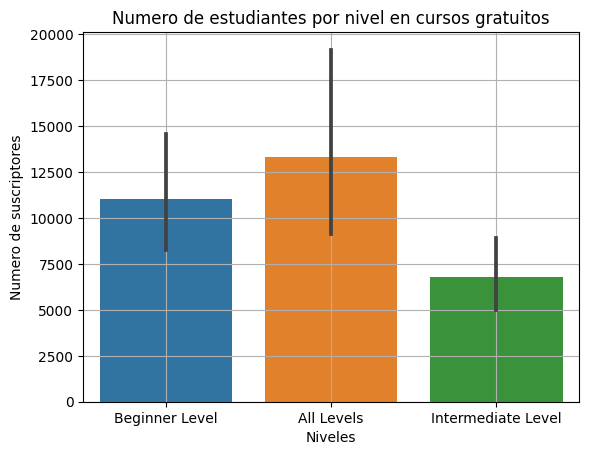

In [34]:
#Tambien es importante ver en que niveles hay mas estudiantes inscriptos si el curso es gratis

ax = sns.barplot(x='level', y='num_subscribers', data=data_udemy[data_udemy['is_paid'] == False])
ax.set(xlabel='Niveles', ylabel='Numero de suscriptores', title='Numero de estudiantes por nivel en cursos gratuitos')
ax.grid()

Es logico que haya una mayor demanda en los cursos que son gratuitos no obstante seria genial establecer una estrategia de marketing que logren fidelizar dichos clientes que obtan por estos cursos de nivel gratuito.

## Segmentación del nivel de ventas segun el precio del curso

In [53]:
data_udemy.price.unique()

array([200,  75,  45,  95, 150,  65, 195,  30,  20,  50, 175, 140, 115,
       190, 125,  60, 145, 105, 155, 185, 180, 120,  25, 160,  40,   0,
       100,  90,  35,  80,  70,  55, 165, 130,  85, 170, 110, 135],
      dtype=int64)

In [44]:
#como son muchos precios hacemos un top de estos cursos 
top_10 = data_udemy.nlargest(10, 'num_subscribers')

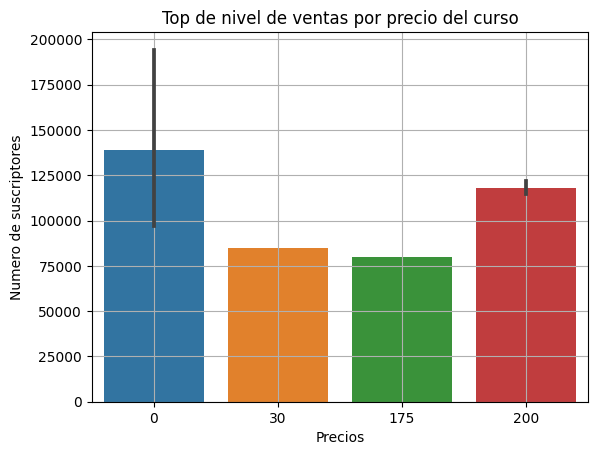

In [49]:
ax = sns.barplot(x='price', y='num_subscribers',data=top_10)
ax.set(xlabel='Precios', ylabel='Numero de suscriptores', title='Top de nivel de ventas por precio del curso')
ax.grid()

Ignorando el numero de suscriptores que adquieren los cursos gratuitos podemos apreciar que los cursos con un valor de 200 $ siendo el precio más alto tiene una mayor demanda con respecto a los precios más bajos

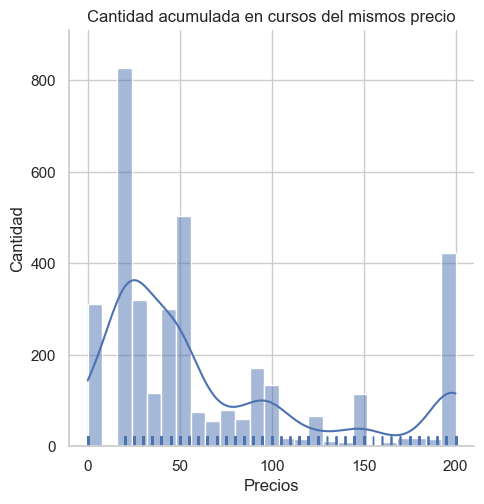

In [167]:
ax = sns.displot(data=data_udemy['price'], bins=25, kde=True, rug=True)
ax.set(title='Cantidad acumulada en cursos del mismos precio', xlabel='Precios', ylabel='Cantidad')

Con repecto a los dos gráficos anteriores podemos apreciar de que a pesar de que no hay muchos cursos con el precio de 175$ es uno de los que más suscriptores tiene. Ahora bien podriamos preguntarnos que que tipos de curso con este precio son los que tienen mas suscriptores segmentaremos inmediatamente estas metricas

In [56]:
precios_175 = data_udemy[data_udemy['price'] == 175]

<AxesSubplot: title={'center': 'Cursos de 175$ con mayor cantidad de suscriptores'}>

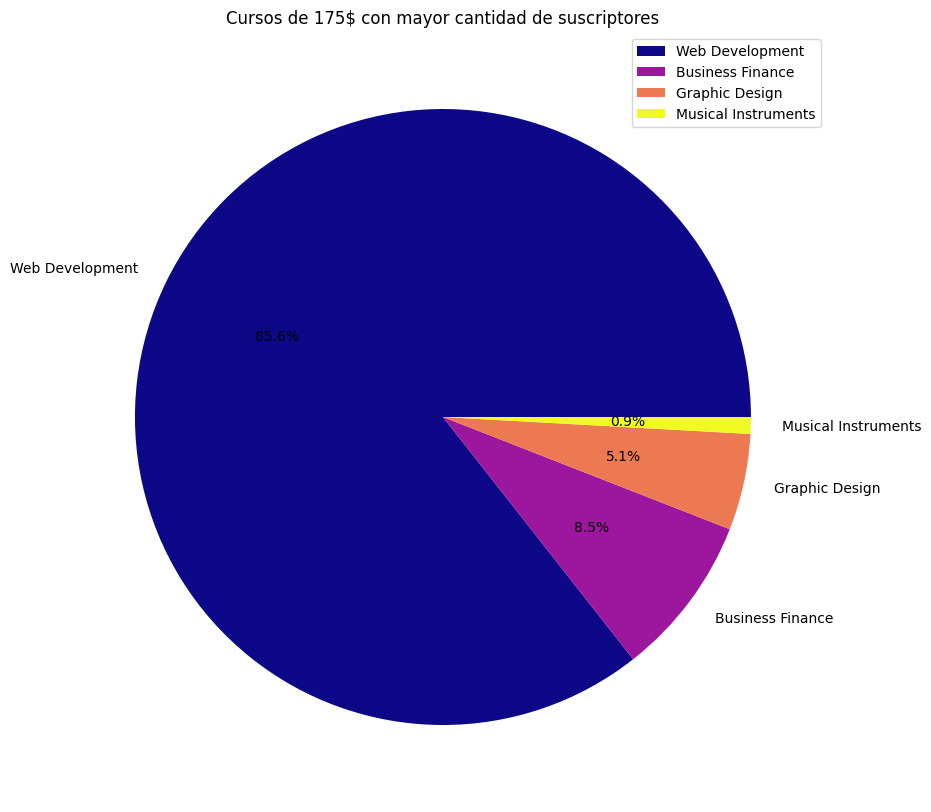

In [71]:
grafico_torta = (precios_175
                .groupby('subject')['num_subscribers']
                .mean()
                .reset_index()
                .sort_values(by='num_subscribers', ascending=False))

grafico_torta.set_index('subject').plot.pie(y='num_subscribers', figsize=(10,10),
colormap='plasma', title= 'Cursos de 175$ con mayor cantidad de suscriptores', ylabel='', autopct='%1.1f%%')

Es impresionante ver que la mayor demanda en los cursos con mas suscriptores en precios de 175$ son los que estan relacionados con la programción web y business Finance, veremos si estas metricas se dan igual para cursos de 200$ y 30$

In [72]:
precios_30 = data_udemy[data_udemy['price'] == 30]
precios_200 = data_udemy[data_udemy['price'] == 200]

<AxesSubplot: title={'center': 'Cursos de 200$ con mayor cantidad de suscriptores'}>

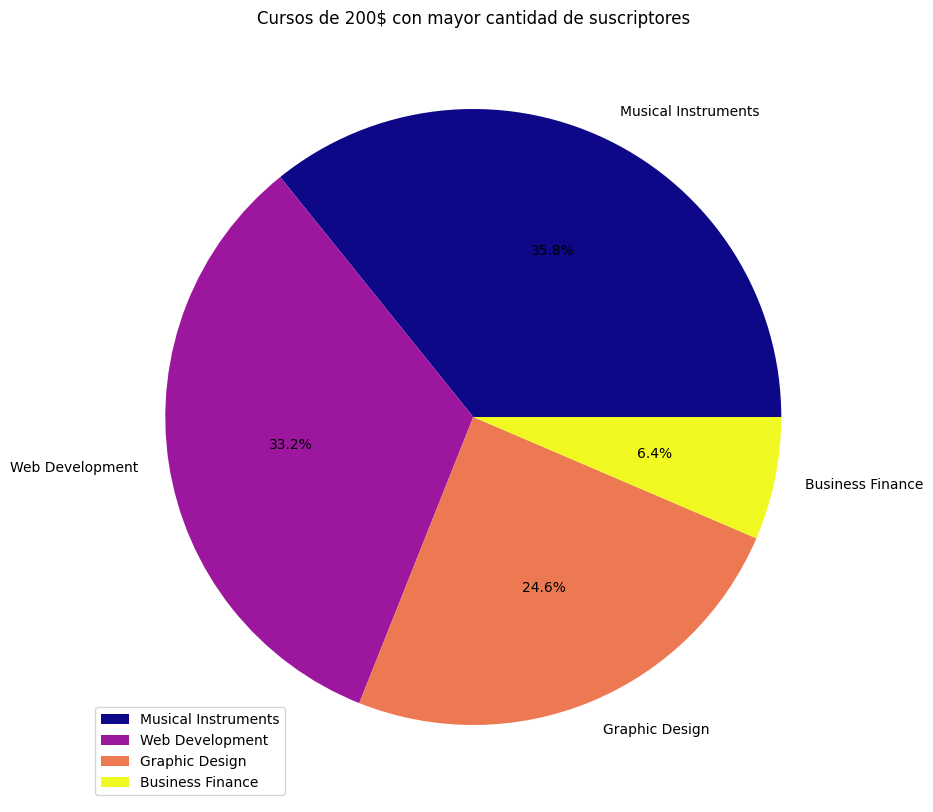

In [86]:
torta_200 = (precios_200
            .groupby('subject')['num_subscribers']
            .mean()
            .reset_index()
            .sort_values(by='num_subscribers', ascending=False))

torta_200.set_index('subject').plot.pie(y='num_subscribers', figsize=(10,10),
colormap='plasma', title='Cursos de 200$ con mayor cantidad de suscriptores', ylabel='', autopct='%1.1f%%')

<AxesSubplot: title={'center': 'Cursos de 30$ con mayor cantidad de suscriptores'}>

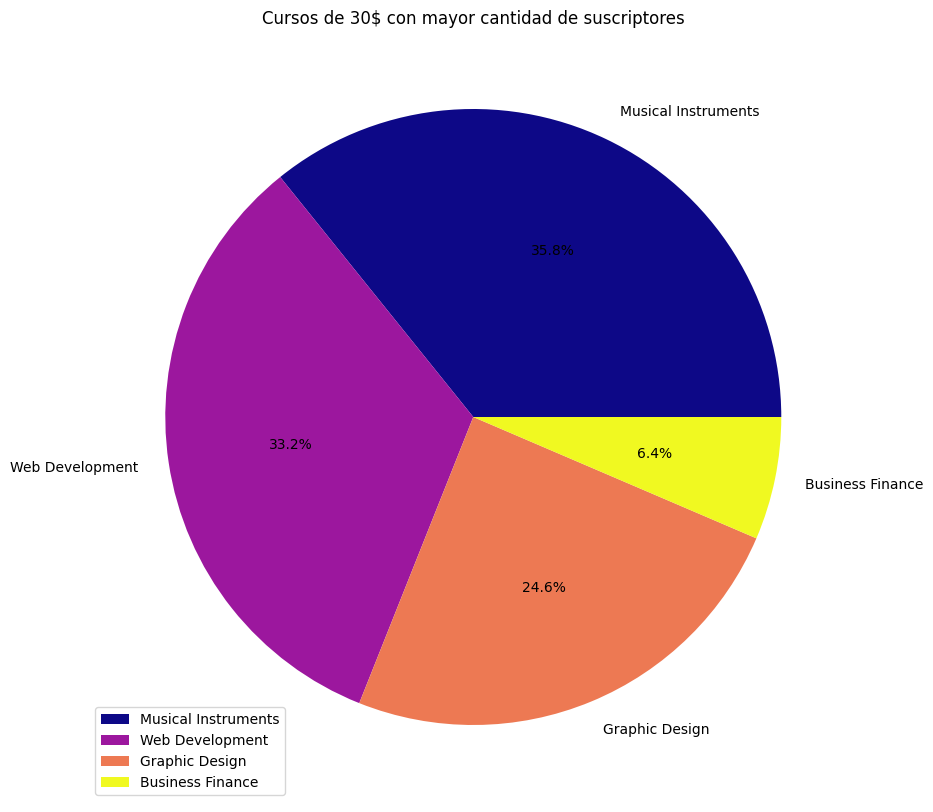

In [87]:
torta_30 = (precios_30
            .groupby('subject')['num_subscribers']
            .mean()
            .reset_index()
            .sort_values(by='num_subscribers', ascending=False))

torta_200.set_index('subject').plot.pie(y='num_subscribers', figsize=(10,10),
colormap='plasma', title='Cursos de 30$ con mayor cantidad de suscriptores', ylabel='', autopct='%1.1f%%')

En un top 3 podemos apreciar que en estos top de precios vemos que los cursos mas comprados son Musica instrumental, desarrollo web y diseño grafico, veremos a continuación que sucede si hacemos una vision general en todos los cursos de cualquier precio

<AxesSubplot: title={'center': 'Porcentaje de suscriptores por tipo de curso'}>

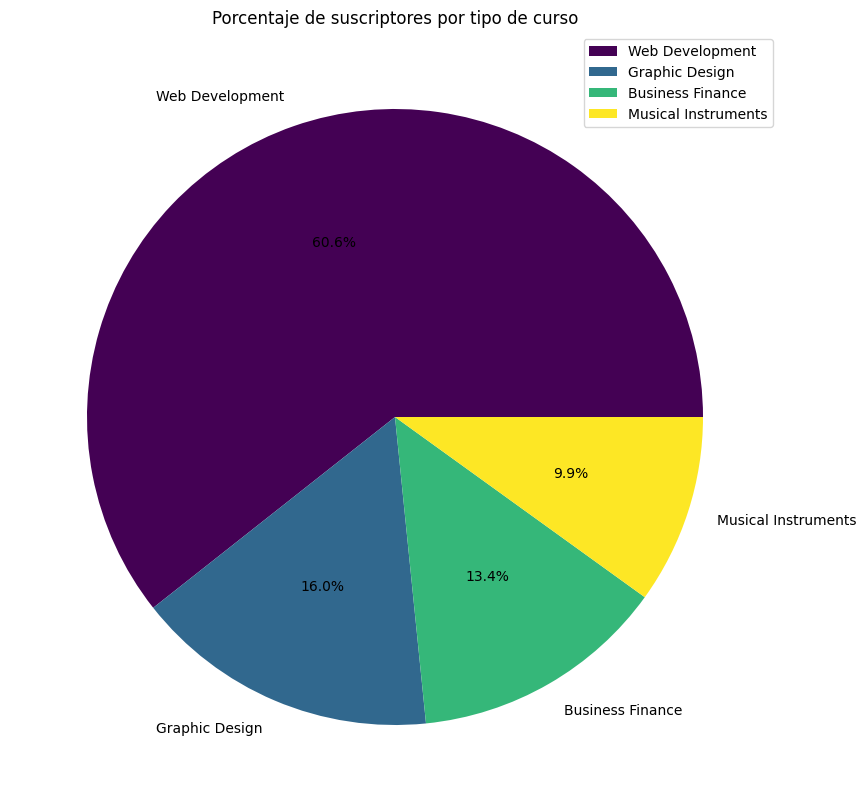

In [89]:
general = (data_udemy[data_udemy['is_paid'] == True]
           .groupby('subject')['num_subscribers']
           .mean()
           .reset_index()
           .sort_values(by='num_subscribers', ascending=False))

general.set_index('subject').plot.pie(y='num_subscribers', figsize=(10,10), colormap='viridis',
 title='Porcentaje de suscriptores por tipo de curso', ylabel='', autopct='%1.1f%%')

Como primera recomendación ya podriamos decir que los cursos orientados a la programación y al desarrollo web asi como tambien los cursos de diseño grafico y finanzas son aquellos que deberiamos considerar para el modelo de negocio que se quiera implementar. 

In [156]:
#generamos un nuevo dataset que enviaremos a powerBi o a stremling para hacer un dashboard
data_udemy.to_csv('udemy_dash.csv', index=False)

### **`EDX`**

Ahora vamos a extraer el dataset de EDX normalizamos el dataset y generamos una segmentación de las variables claves.

In [136]:
data_edx = pd.read_csv('edx_courses.csv')

In [100]:
data_edx.head() #Echamos la primera vizualizacion de los datos

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [137]:
data_edx.info() #Info de la data de edx

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [138]:
data_edx[data_edx.duplicated()] #chequeamos si hay duplicados de ser asi los dropeamos

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
95,Introduction to Probability,"Learn probability, an essential language and s...","97,291",Self-paced on your time,Harvard University,Joseph Blitzstein,Intermediate,Data Analysis & Statistics,English,English,5–10 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD,Probability and statistics help to bring logic...,NaN,https://www.edx.org/course/introduction-to-pro...


In [139]:
#Dropeando dublicados
data_edx.drop_duplicates(inplace=True)

In [140]:
#Checheamos si existen nulos y que los cuente por columna
data_edx.isna().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       557
course_url              0
dtype: int64

## Breve analisis de la situacion

1) debemos normalizar la columna n_enrolled de tipo de dato de object a float cambiando asi la coma por un punto y tambien los campos vacios a 0 interpretaremos si un campo de esta columna es vacia significa que no hay suscriptores aun para dicho curso.

2) la columna sera modificada a un campo que solo tenga los precios

3) las otras columnas con datos vacios solo tienen descripciones de los cursos las dejaremos asi vacias nada mas

In [141]:
data_edx['n_enrolled'].fillna(0, inplace=True) #Reemplazamos nulos en la columna n_enrolled por 0
data_edx['n_enrolled'] = data_edx['n_enrolled'].str.replace(',','') #quitamos las , por '' con el fin de evitar errores cuando se hagan graficos
data_edx['n_enrolled'] = data_edx['n_enrolled'].astype(float) #cambiamos el dato a tipo float

In [142]:
data_edx['price'] = data_edx['price'].str.extract('(\d+)').astype(int) #Modificamos la columna precios 

In [149]:
data_edx.drop(columns=['course_syllabus'], inplace=True) #Dropeamos la columna Course_stallybus ya que no aporta nada al modelo

In [151]:
#Normalizamos las columnas con campos vacios 
data_edx['summary'].fillna(value= 'Sin dato', inplace=True)
data_edx['instructors'].fillna(value='Sin dato', inplace=True)
data_edx['subtitles'].fillna(value='Sin dato', inplace= True)
data_edx['course_description'].fillna('Sin dato', inplace= True)

In [153]:
data_edx.isna().sum() #verificamos

title                 0
summary               0
n_enrolled            0
course_type           0
institution           0
instructors           0
Level                 0
subject               0
language              0
subtitles             0
course_effort         0
course_length         0
price                 0
course_description    0
course_url            0
dtype: int64

In [158]:
#Normalizamos la columna Level
data_edx.rename(columns={'Level': 'level'}, inplace=True)

In [159]:
data_edx.head(2)

,title,summary,n_enrolled,course_type,institution,instructors,level,subject,language,subtitles,course_effort,course_length,price,course_description,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,124980.0,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,49,"Designed for those who are new to elearning, t...",https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864.0,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,49,This course aims to teach everyone the basics ...,https://www.edx.org/course/programming-for-eve...


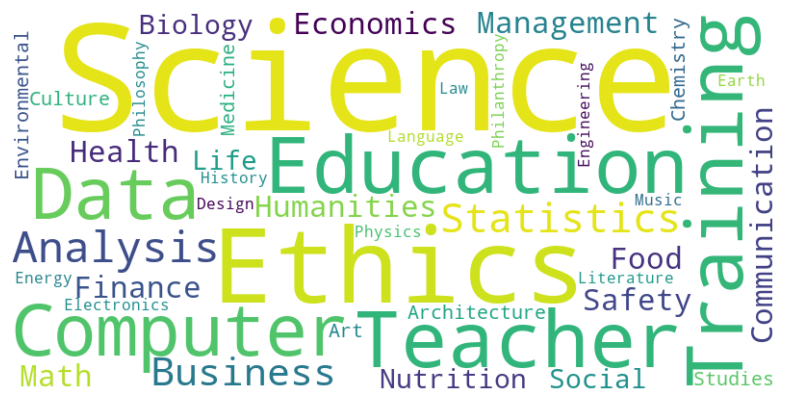

In [160]:
#Importamos el modulo wordcloud para generar una nube de palabras 
from wordcloud import WordCloud as wc

palabras = ' '.join(data_edx['subject'].unique())
wordcloud = wc(width=800, height=400, background_color='white').generate(palabras)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## segmentación de los datos 

<AxesSubplot: title={'center': 'Porcentaje de suscriptores por tipo de curso'}>

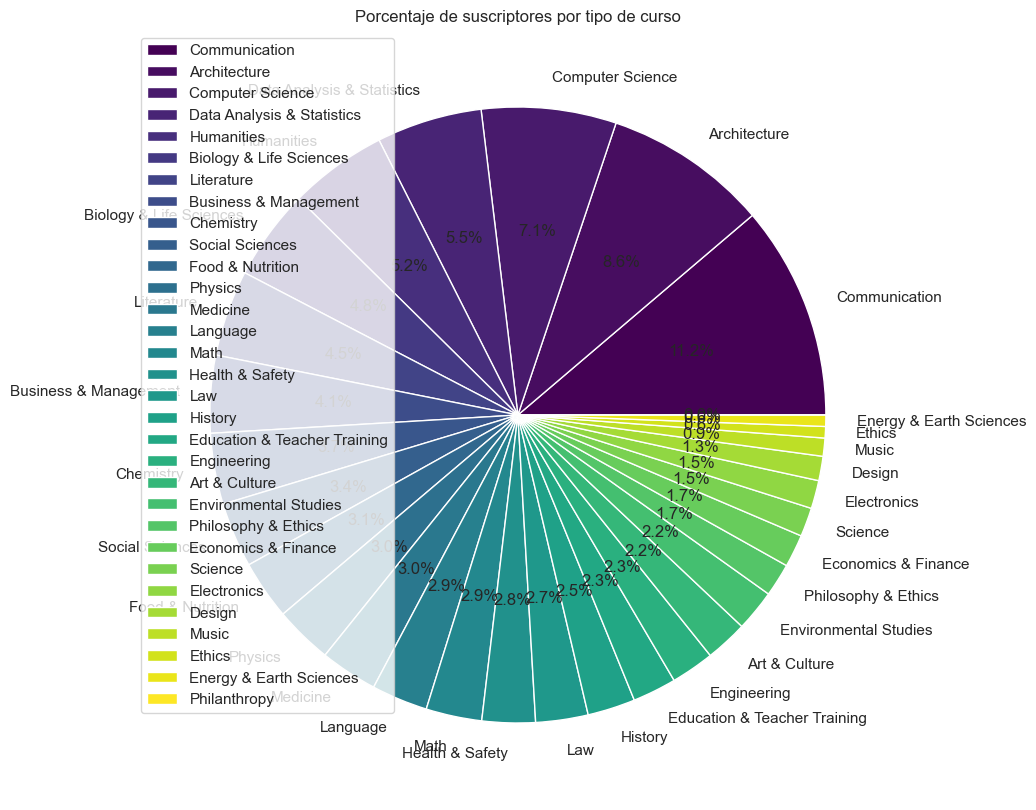

In [163]:
#Segmentacion de numero de estudiantes inscriptos por tipo de curso

seg1 = (data_edx
        .groupby('subject')['n_enrolled']
        .mean()
        .reset_index()
        .sort_values(by='n_enrolled', ascending=False))

seg1.set_index('subject').plot.pie(y='n_enrolled', figsize=(10,10), colormap='viridis',
title='Porcentaje de suscriptores por tipo de curso', ylabel='', autopct='%1.1f%%')

Dentro de este dataset podriamos decir que en un top 5 los cursos con mas demanda son: comunicacion, arquitectura, computacion, analisis de datos y humanidades. Veremos como influyen otras metricas ara que la gente opte mas por estos cursos.

También es importante destacar que comparando la informacion con el otro dataset podemos apreciar que los cursos relacionados con la computación y programación han estado dentro del top 3 de los cursos con mas suscriptores.

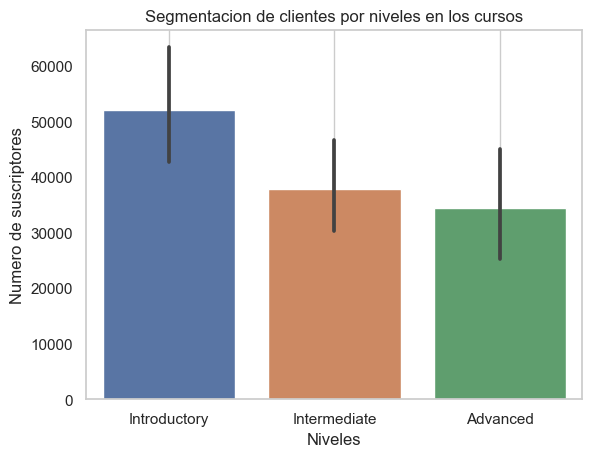

In [165]:
ax = sns.barplot(x='level', y = 'n_enrolled', data= data_edx)
ax.set(xlabel='Niveles', ylabel='Numero de suscriptores', title='Segmentacion de clientes por niveles en los cursos')
#ax.grid()

Podemos apreciar en el grafico anterior que existe una mayor demanda en el numero de suscritores en los cursos con un nivel introductorio, se podria decir que a medida que aumentan los niveles en los cursos el nivel de suscriptores baja se debe quizas a:

1_ La mayoria de los suscriptores optan por un curso que lo instruya desde los primeros pasos.

2_ Una vez terminado el nivel introductorio de un curso gran parte de los suscriptores sienten que pueden seguir aprendiendo de manera independiente. 

3_ Pueden haber adquirido los cursos de nivel introductorio por tener un precio más económico sabremos de esto en el siguiente grafico.

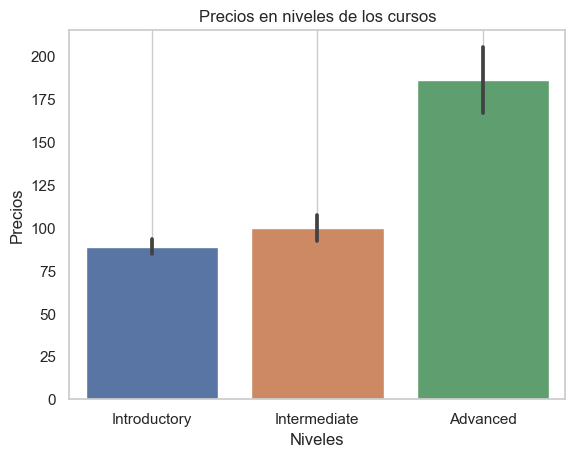

In [169]:
ax = sns.barplot(x='level', y='price', data=data_edx)
ax.set(xlabel='Niveles', ylabel='Precios', title='Precios en niveles de los cursos')
ax.grid()

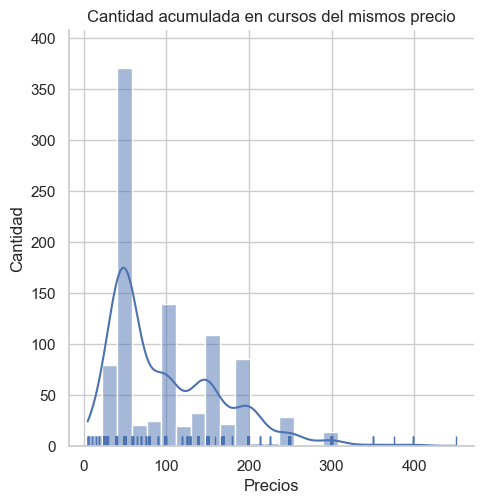

In [166]:
#Distribucion de los precios
ax = sns.displot(data=data_edx['price'], bins=25, kde=True, rug=True)
ax.set(title='Cantidad acumulada en cursos del mismos precio', xlabel='Precios', ylabel='Cantidad')

In [171]:
data_edx.institution.unique()

array(['edX', 'The University of Michigan', 'Harvard University',
       'Massachusetts Institute of Technology',
       'University of California, Berkeley', 'University of Adelaide',
       'The University of Queensland', 'Curtin University',
       'Technische Universität München',
       'National Research Nuclear University', 'SDG Academy',
       'University of Hong Kong', 'IBM',
       'Wageningen University & Research', 'Boston University',
       'Educational Testing Service',
       'Universitat Politècnica de Valencia', 'Universidades Anáhuac',
       'Wellesley College', 'Waseda University', 'The Linux Foundation',
       'Universidad Galileo', 'Indian Institute of Management Bangalore',
       'The Georgia Institute of Technology', 'New York University',
       'The World Wide Web Consortium (W3C)', 'Columbia University',
       'Stanford University', 'Cornell University', 'Davidson College',
       'Berklee College of Music', 'The Hong Kong Polytechnic University',
      

In [172]:
#Como son muchas instituciones con cursos en edx haremos un top 10 de las que tiene  mas cursos y ver cuales tiene mayor impacto.

data_edx.institution.value_counts().head(10)

Harvard University                       103
Universitat Politècnica de Valencia       47
Massachusetts Institute of Technology     41
Delft University of Technology            30
IBM                                       30
Inter-American Development Bank           29
The University of Queensland              26
The University of Michigan                22
Tecnológico de Monterrey                  21
Columbia University                       20
Name: institution, dtype: int64

In [173]:
#Ahora con este top 10 veremos cuales tiene una mayor matricula de suscriptores
top_10_instituciones = data_edx[data_edx['institution'].isin(['Harvard University', 'Universitat Politècnica de Valencia',
                                                    'Massachusetts Institute of Technology','Delft University of Technology',
                                                    'IBM', 'Inter-American Development Bank', 'The University of Queensland',
                                                    'The University of Michigan', 'Tecnológico de Monterrey', 'Columbia University'])]

<AxesSubplot: title={'center': 'Top 10 de instituciones con mayor demanda de estudiantes'}>

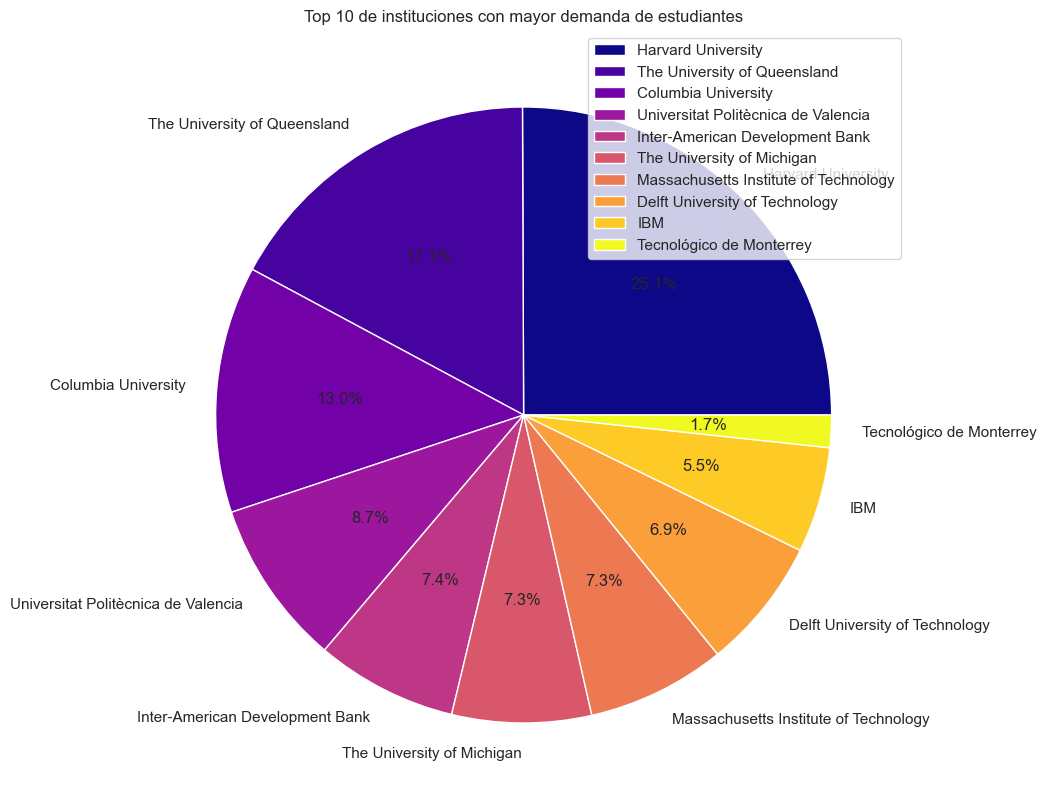

In [174]:
top10 = (top_10_instituciones
        .groupby('institution')['n_enrolled']
        .mean()
        .reset_index()
        .sort_values(by='n_enrolled', ascending=False))

top10.set_index('institution').plot.pie(y='n_enrolled', figsize=(10,10), colormap='plasma', 
title='Top 10 de instituciones con mayor demanda de estudiantes', ylabel='', autopct='%1.1f%%')

Es de esperar que los cursos impartidos por la universidad de harvard sean los que tengan una mayor demanda de estudiantes mas sin embargo podemos ver como en el puesto dos a pesar en el top 7 de institutos con mas cursos se posiciona en segundo lugar con mayor cantidad de estudiantes y tambien los cursos de columbia university que a pesar de estar en el top 10 se posicisiona en el tercer lugar con mayor cantidad en matricula de estudiantes, analizaremos inmediatamente por separado que tipos de cursada imparten estos institutos y cual es su impacto en el mercado.

In [175]:
columbia = data_edx[data_edx['institution'] == 'Columbia University']
queensland = data_edx[data_edx['institution'] == 'The University of Queensland']

<AxesSubplot: title={'center': 'Cursos con mayor demanda de estudiantes en la Universidad de Queensland'}>

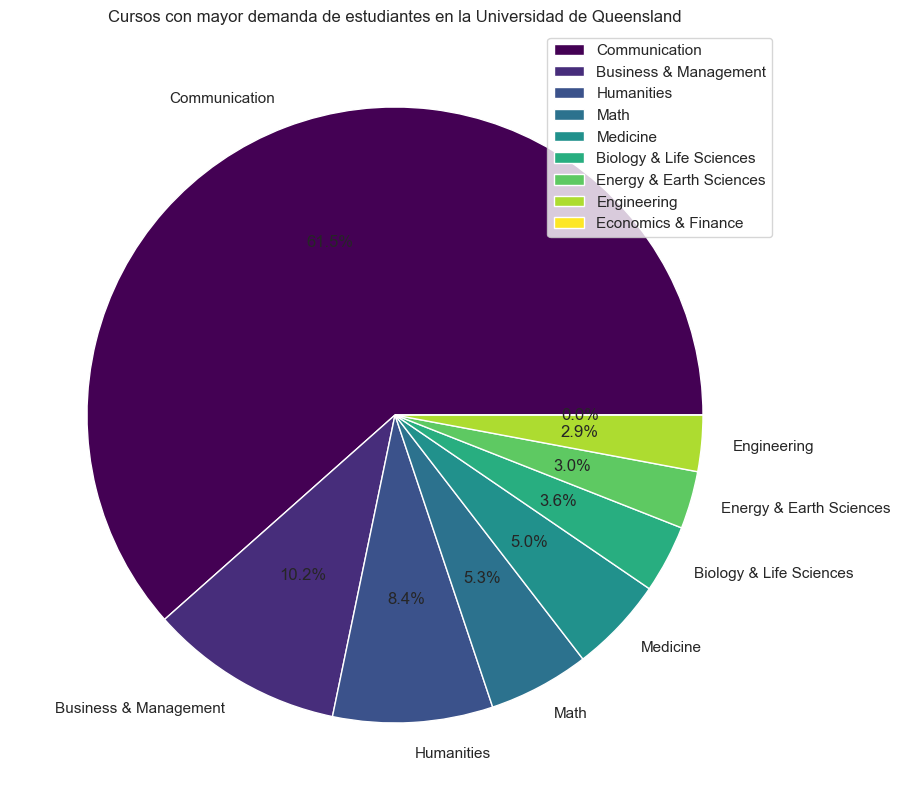

In [177]:
#ahora veremos que tipos de cursos tienen mayor demanda en la universidad de queensland

top_q = (queensland
        .groupby('subject')['n_enrolled']
        .mean()
        .reset_index()
        .sort_values(by='n_enrolled', ascending=False))

top_q.set_index('subject').plot.pie(y='n_enrolled', figsize=(10,10), colormap='viridis',
title='Cursos con mayor demanda de estudiantes en la Universidad de Queensland', autopct='%1.1f%%', ylabel='')

En un top3 de los cursos con mas matricula de estudiantes estan los cursos de Comunicación con un 61.5%, Gestion de negocios con un 10.2% de la matricula y Humanidades con un  8.4% de la matricula. Siendo estos cursos los más atrativos o con mayor cantidad de suscriptores dentro de esta universidad. Coincidiendo as los cursos de Comunicacion con el top general que se hizo en el grafico de porcentaje de alumnos por tipo de curso


<AxesSubplot: title={'center': 'Cursos con mayor demanda de estudiantes en la Universidad de Queensland'}>

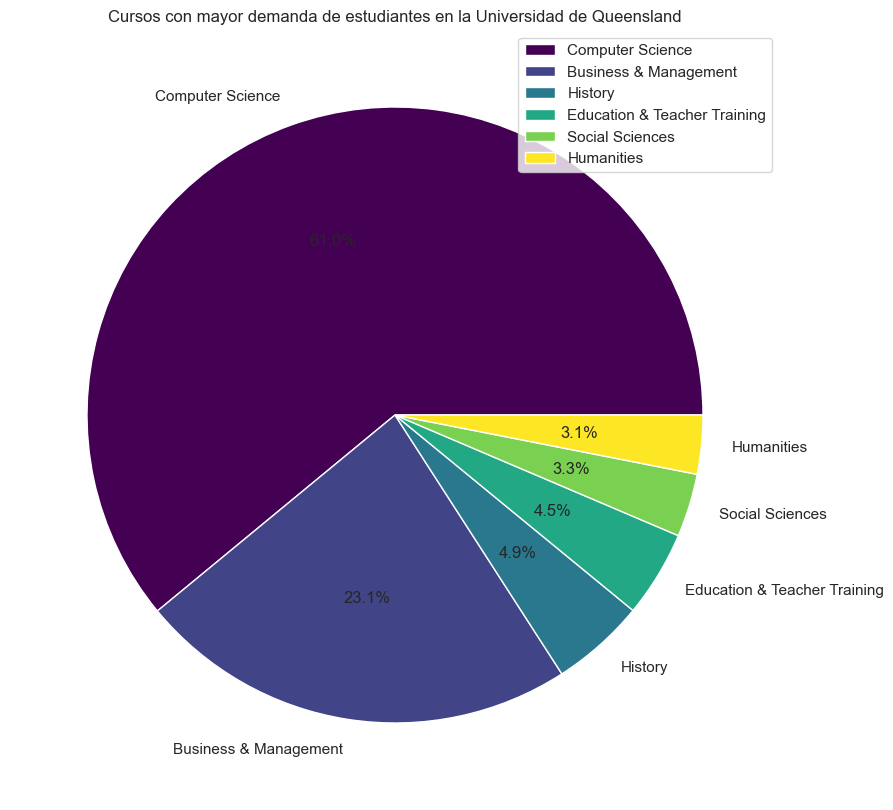

In [180]:
#ahora veremos que tipos de cursos tienen mayor demanda en la universidad de columbia

top_c = (columbia
        .groupby('subject')['n_enrolled']
        .mean()
        .reset_index()
        .sort_values(by='n_enrolled', ascending=False))

top_c.set_index('subject').plot.pie(y='n_enrolled', figsize=(10,10), colormap='viridis',
title='Cursos con mayor demanda de estudiantes en la Universidad de Queensland', autopct='%1.1f%%', ylabel='')

 Uno de los cursos con mayor demanda en la universidad de Queensland son los de computer science, cursos relacionados a estos temas se pueden sugerir al modelo de negocios que se quiera plantear.

## Segmentación del nivel de ventas segun los subtitulos

In [186]:
data_edx.subtitles.unique()

array(['English', 'English, Español, Русский', 'English, 中文, 中文',
       'Deutsch, English, Español, Português, 中文', 'English, Español',
       'Español', 'Italiano', 'English, 日本語', 'English, हिन्दी',
       'English, Português', 'English, 中文', 'English, Français',
       'اللغة العربية, English, עברית',
       'English, Español, Français, עברית, Indonesian, Italiano, 日本語, Português, Türkçe',
       'English, Español, Português, 中文', 'English, 日本語, 한국어, 中文',
       'Français', 'اللغة العربية, English, Español, हिन्दी, Português',
       'Español, Español', 'English, Español, Français, 中文', 'Sin dato',
       '日本語, 中文', 'Português', 'English, Español, Português',
       'English, Русский',
       'اللغة العربية, English, Español, Français, Русский, 中文',
       'English, Français, 中文, 中文', 'Deutsch, English, Español, Français',
       'اللغة العربية', 'Deutsch',
       'اللغة العربية, English, Español, Français, Русский',
       'English, English, 中文, 中文', 'English, Português, Русский',

podemos ver como esta columna necesita una normalizacion asi que lo haremos inmediatamente

In [187]:
data_edx['subtitles'] = data_edx['subtitles'].str.replace('中文', 'Chino')  ##Normalizando subtitulo Chino
data_edx['subtitles'] = data_edx['subtitles'].str.replace('हिन्दी', 'Hindu') ##Normalizando subtitulo Hindí
data_edx['subtitles'] = data_edx['subtitles'].str.replace('日本語', 'Japones') #Normalizando subtitulo Japones
data_edx['subtitles'] = data_edx['subtitles'].str.replace('Français', 'Frances') #normalizando subtitulo Frances
data_edx['subtitles'] = data_edx['subtitles'].str.replace('עברית', 'Hebreo') #Normalizando subtitulo Hebreo
data_edx['subtitles'] = data_edx['subtitles'].str.replace('اللغة العربية', 'Arabe') #Normalizando subtitulo Arabe
data_edx['subtitles'] = data_edx['subtitles'].str.replace('Русский', 'Ruso') #normalizando subtitulo Ruso
data_edx['subtitles'] = data_edx['subtitles'].str.replace('Deutsch', 'Aleman') #normalizando subtitulo Aleman
data_edx['subtitles'] = data_edx['subtitles'].str.replace('한국어', 'Coreano') #normalizando subtitulo Coreano
data_edx['subtitles'] = data_edx['subtitles'].str.replace('Türkçe', 'Turko') #normalizando subtitulo Turco

In [191]:
data_edx.subtitles.value_counts()

English                                                                               712
Español                                                                               157
English, Español                                                                       21
English, Chino                                                                         21
English, Hindu                                                                         10
Frances                                                                                 7
English, Ruso                                                                           5
Português                                                                               4
Italiano                                                                                4
English, Japones                                                                        3
Sin dato                                                                                3
English, C

In [192]:
"""Haremos 3 mascaras, una para cursos de un solo subtitulo, 2 para cursos de 2  subtitulos y 3 para cursos mayores o iguales a 3 
subtitulos"""

mascara_1 = data_edx[data_edx['subtitles'].isin(['English', 'Español', 'Frances', 'Chino', 'Italiano', 'Japones', 'Aleman',
                                        'Ruso', 'Português', 'Arabe'])]

mascara2 = data_edx[data_edx['subtitles'].isin(['English, Español', 'English, Chino', 'English, Hindu', 'English, Ruso',
                                        'English, Japones', 'English, Frances', 'Japones, Chino', 'English, Português'])]

mascara3 = data_edx[data_edx['subtitles'].isin(['English, Chino, Chino','Arabe, English, Hebreo', 'English, Español, Português',
                                      'English, Português, Ruso', 'English, English, Chino, Chino', 'Arabe, English, Español, Frances, Ruso',
                                      'Aleman, English, Español, Frances', 'English, Frances, Chino, Chino',
                                      'Arabe, English, Español, Frances, Ruso, Chino', 'English, Español, Frances, Chino', 
                                      'Arabe, English, Español, Hindu, Português', 'English, Español, Ruso', 
                                      'English, Japones, Coreano, Chino', 'English, Español, Português, Chino', 
                                      'English, Español, Frances, Hebreo, Indonesian, Italiano, Japones, Português, Turko',
                                      'Aleman, English, Español, Português, Chino', 'English, Frances, Italiano'])]

[Text(0, 0.5, ''), Text(0.5, 1.0, 'Demanda de los cursos segun su subtitulo')]

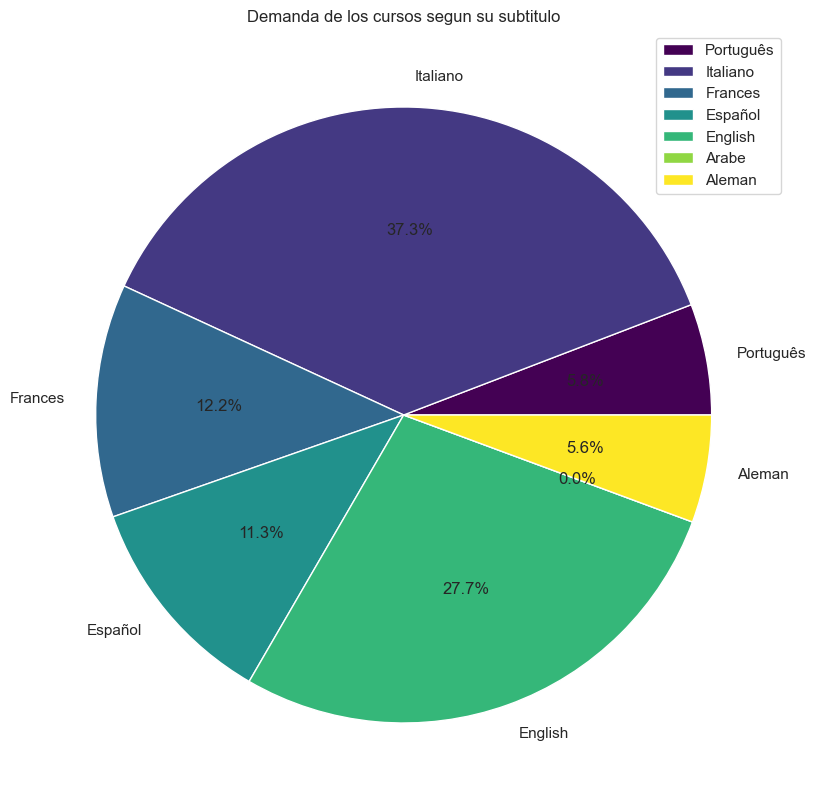

In [193]:
top_mascara1 = (mascara_1
                .groupby('subtitles')['n_enrolled']
                .mean()
                .reset_index()
                .sort_values(by='subtitles', ascending=False))

ax = top_mascara1.set_index('subtitles').plot.pie(y='n_enrolled', figsize=(10,10), colormap='viridis', autopct='%1.1f%%')
ax.set(ylabel='', title='Demanda de los cursos segun su subtitulo')

La cantidad de suscritores donde el curso solo tiene el subtitulo de Italiano es muy alta a pesar de que solo hay 4 cursos con esta condición a diferencia de que los cursos con el subtitulo Ingles hay mas de 700 cursos. Se sugiere implementar los cursos con subtitulo italiano y tambien con subtitulo Español, Frances, Portugues y Aleman.

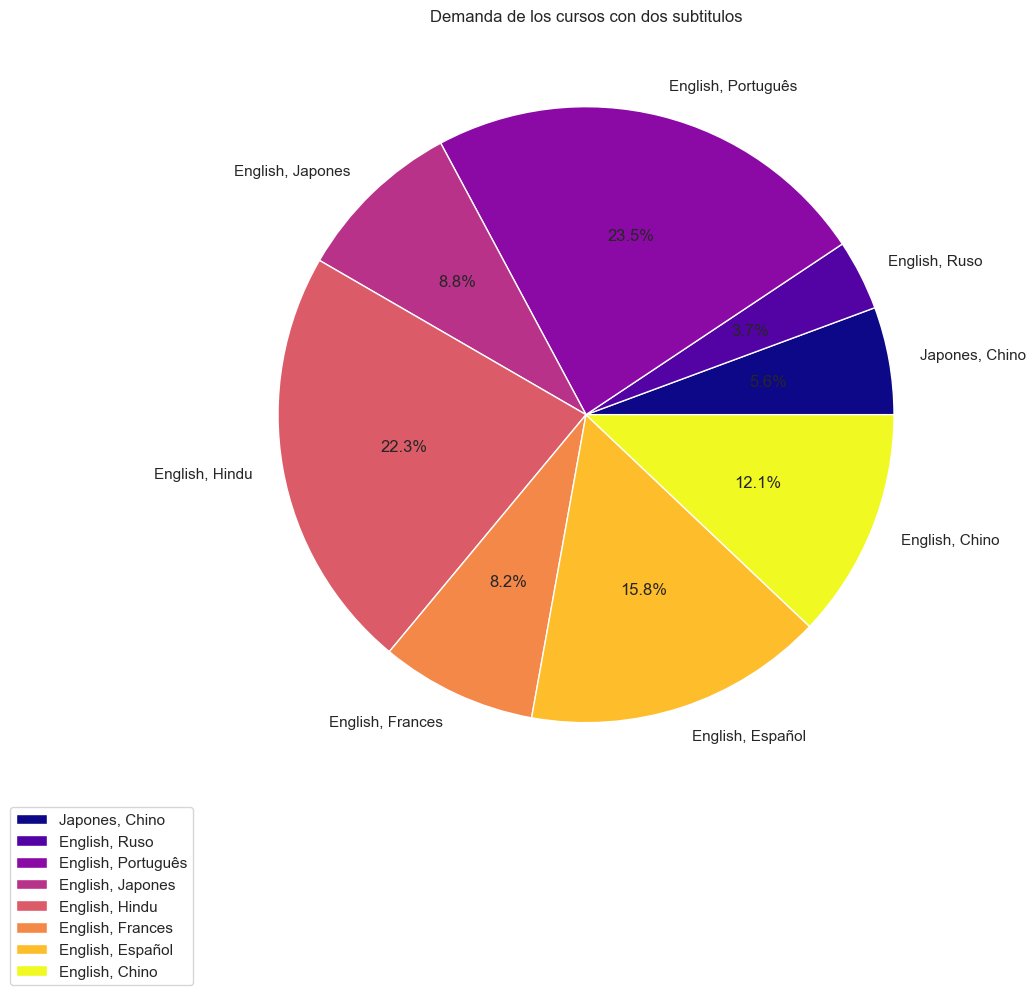

In [194]:
top_mascara2 = (mascara2
                .groupby('subtitles')['n_enrolled']
                .mean()
                .reset_index()
                .sort_values(by='subtitles', ascending = False))

ax = top_mascara2.set_index('subtitles').plot.pie(y='n_enrolled', figsize=(10,10), colormap='plasma', autopct='%1.1f%%')
ax.set(ylabel='', title='Demanda de los cursos con dos subtitulos')
ax.legend(bbox_to_anchor=(0, 0, 0, 0))

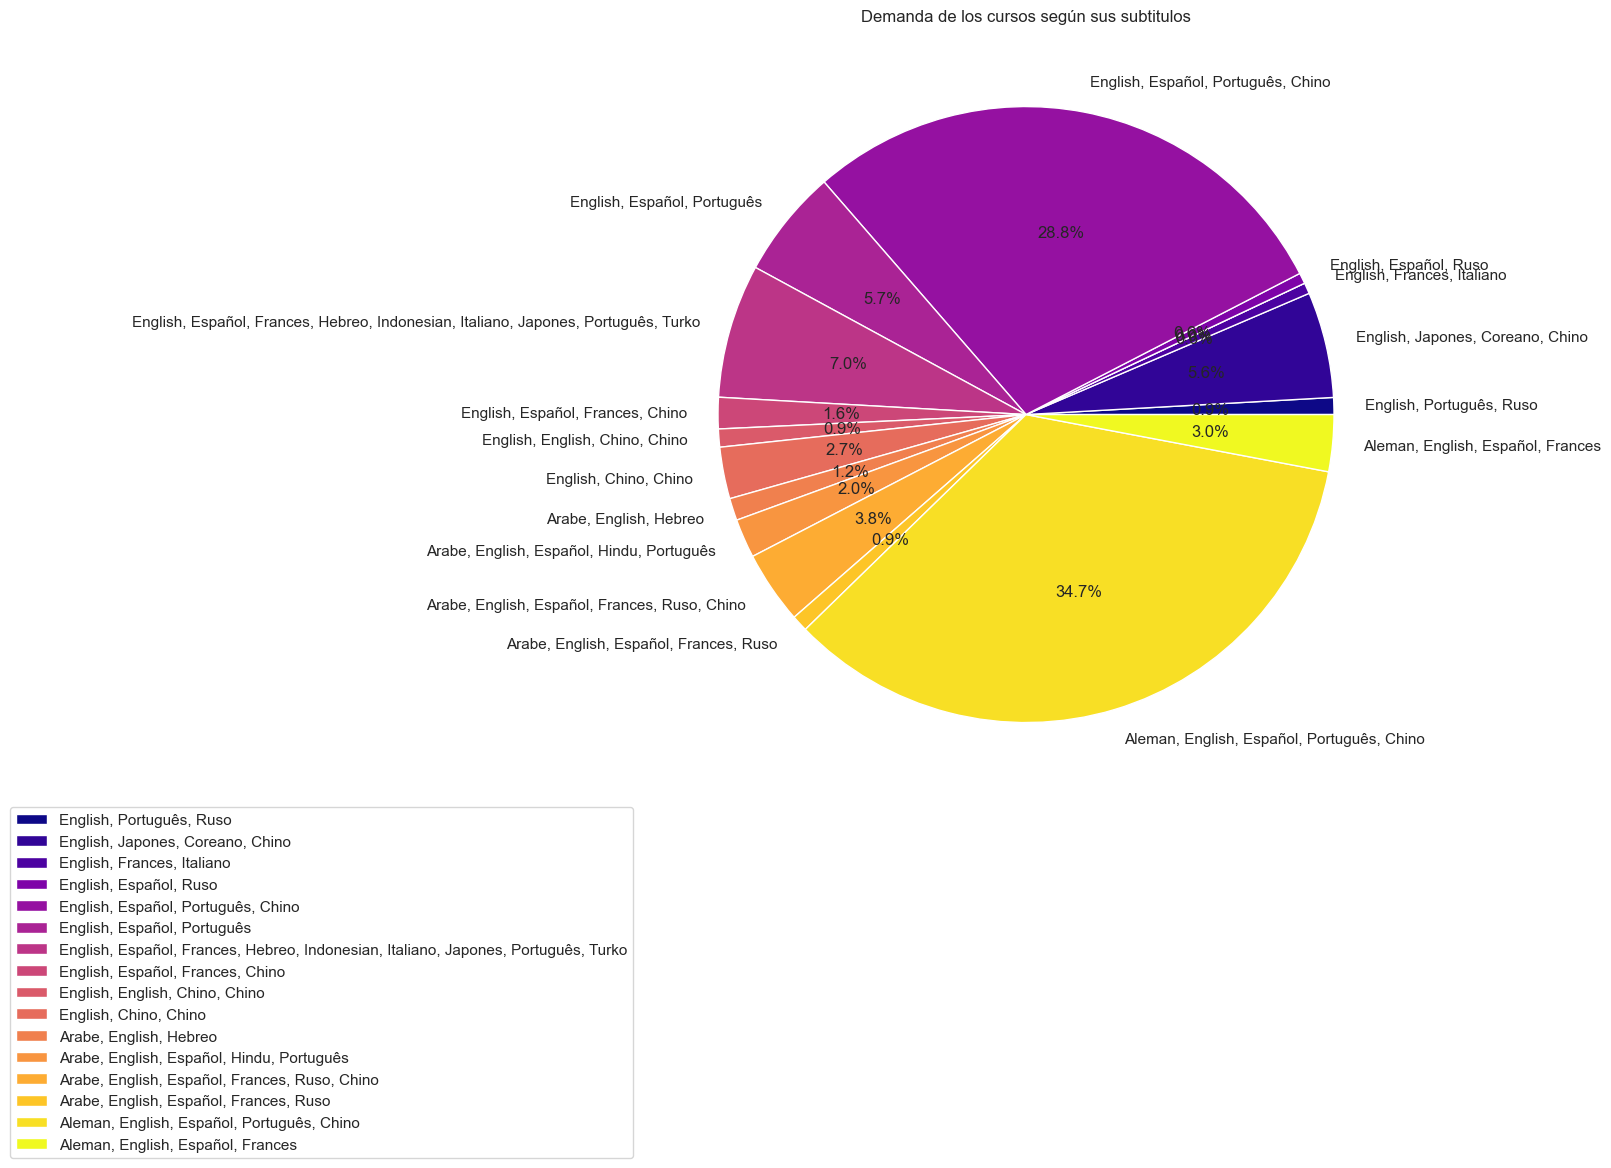

In [195]:
top_mascara3 = (mascara3
                .groupby('subtitles')['n_enrolled']
                .mean()
                .reset_index()
                .sort_values(by='subtitles', ascending=False))

ax= top_mascara3.set_index('subtitles').plot.pie(y='n_enrolled', figsize=(10,10), colormap='plasma', autopct='%1.1f%%')
ax.set(ylabel='', title='Demanda de los cursos según sus subtitulos')
ax.legend(bbox_to_anchor=(0,0,0,0))

Viendo los graficos anteriores se puede apreciar que existen una mayor demanda en los cursos en ingles pero en conjunto con otros lenguajes los cuales son los mas destacados en esta data como lo son: Español, Italiano, Aleman, Portugues, Frances y Chino. 